# Imports

- **Replace Null Values in Age column**

### 4- Handle Outliers

- **Check for Outliers**

In [4]:
import numpy as np 
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [5]:
df = pd.read_csv("E:/Alsayad Electronics/Downloads/train.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
df.drop(['PassengerId','Name', 'Ticket'], axis = 1, inplace= True)
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,male,22.0,1,0,7.2500,NaN,S
1,1,1,female,38.0,1,0,71.2833,C85,C
2,1,3,female,26.0,0,0,7.9250,NaN,S
3,1,1,female,35.0,1,0,53.1000,C123,S
4,0,3,male,35.0,0,0,8.0500,NaN,S


## Chk datatype

In [7]:
dtypes = df.dtypes
n_uniq = df.nunique()
pd.DataFrame({"Dtype":dtypes, "Num_Uniqe":n_uniq}).T

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
Dtype,int64,int64,str,float64,int64,int64,float64,str,str
Num_Uniqe,2,3,2,88,7,7,248,147,3


In [8]:
def chk_types(data):
    dtypes = df.dtypes
    n_uniq = df.nunique()
    
    return pd.DataFrame({"Dtype":dtypes, "Num_Uniqe":n_uniq}).T

In [9]:
def chk_types_table(data):
    return pd.DataFrame({
        "Dtype": data.dtypes,
        "Num_Unique": data.nunique()
    }).T


In [10]:
chk_types_table(df)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
Dtype,int64,int64,str,float64,int64,int64,float64,str,str
Num_Unique,2,3,2,88,7,7,248,147,3


In [11]:
cols = ['Pclass',
        'Survived',
        'Sex',
        'SibSp',
        'Parch',
        'Embarked']
df[cols] = df[cols].astype('category')


In [12]:
chk_types(df)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
Dtype,category,category,category,float64,category,category,float64,str,category
Num_Uniqe,2,3,2,88,7,7,248,147,3


In [13]:
df.shape[0]

891

In [14]:
null = df.isnull().sum()
ratio = (null/ df.shape[0])*100
pd.DataFrame({"Null":null, "ratio % ":ratio}).T

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
Null,0.0,0.0,0.0,177.00000,0.0,0.0,0.0,687.000000,2.000000
ratio %,0.0,0.0,0.0,19.86532,0.0,0.0,0.0,77.104377,0.224467


In [15]:
median_1 = df['Age'].median()
df['Age'].fillna(median_1, inplace=True)


0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888    28.0
889    26.0
890    32.0
Name: Age, Length: 891, dtype: float64

In [16]:
df.dropna(subset=['Embarked'], inplace= True)
df = df.drop("Cabin", axis=1)

In [17]:
null = df.isnull().sum()
ratio = (null/ df.shape[0])*100
pd.DataFrame({"Null":null, "ratio % ":ratio}).T

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
Null,0.0,0.0,0.0,177.000000,0.0,0.0,0.0,0.0
ratio %,0.0,0.0,0.0,19.910011,0.0,0.0,0.0,0.0


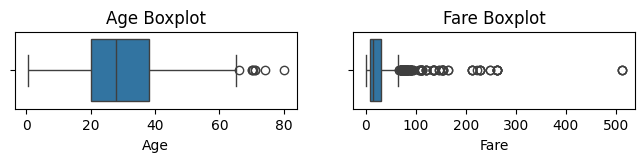

In [18]:
num_cols = df.select_dtypes('number').columns
plt.figure(figsize=(8,1))
for i , col in enumerate(num_cols):
    plt.subplot(1,2, i+1)
    sns.boxplot(df[col], orient="h")
    plt.title(f"{col} Boxplot")

In [19]:
def outliers_change(num_cols):
    for col in num_cols:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_fence = Q1 -  1.5*IQR
        upper_fence = Q3 +  1.5*IQR
        # print(lower_fence)
        lower_outliers = df[df[col]< lower_fence][col].values
        upper_outliers = df[df[col]> upper_fence][col].values
        
        df[col].replace(lower_outliers, lower_fence, inplace=True)
        df[col].replace(upper_outliers, upper_fence, inplace=True)

    # upper_outliers = 
    


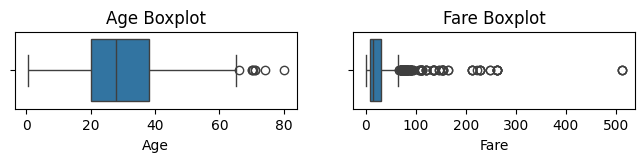

In [20]:
num_cols = df.select_dtypes('number').columns
plt.figure(figsize=(8,1))
for i , col in enumerate(num_cols):
    plt.subplot(1,2, i+1)
    sns.boxplot(df[col], orient="h")
    plt.title(f"{col} Boxplot")

In [21]:
df.duplicated().sum()

np.int64(111)

In [22]:
df.drop_duplicates(inplace=True)

In [23]:
df.duplicated().sum()

np.int64(0)

In [61]:
px.histogram(df , x = 'Survived' , color = 'Sex' , title = '<b> Survived based on gender')

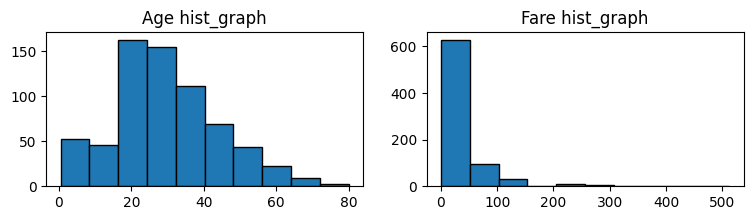

In [24]:
plt.figure(figsize=(9,2))
for i , col in enumerate(num_cols):
    plt.subplot(1, 2, i + 1 )
    plt.hist(df[col], edgecolor = 'black')
    plt.title(f"{col} hist_graph")
plt.show()

In [25]:
cat_cols = df.select_dtypes('category').columns

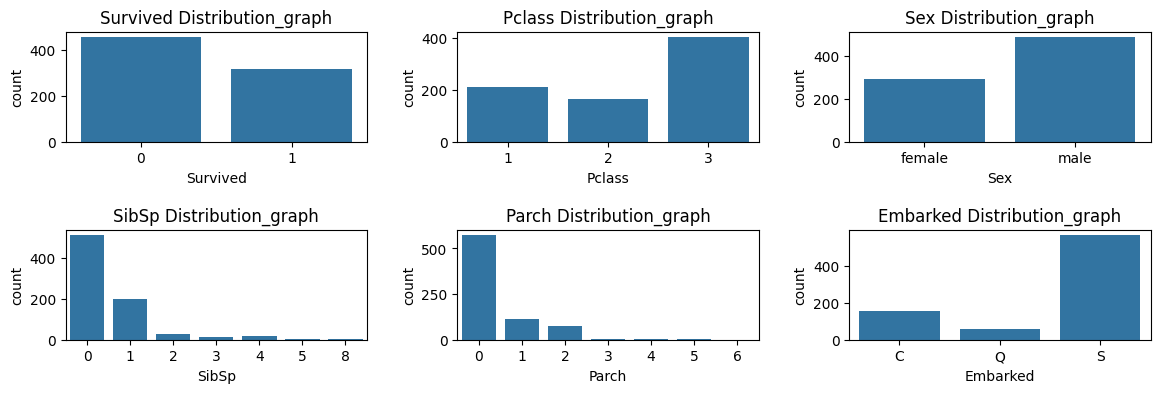

In [26]:
plt.figure(figsize=(14,4))
for i , col in enumerate(cat_cols):
    plt.subplot(2, 3, i + 1 )
    sns.countplot(x = col, data = df)
    plt.title(f"{col} Distribution_graph")
    plt.subplots_adjust(hspace = .8, wspace=.3)
plt.show()

In [27]:
unique = df['Survived'].value_counts()
count = unique.values
categories = unique.index

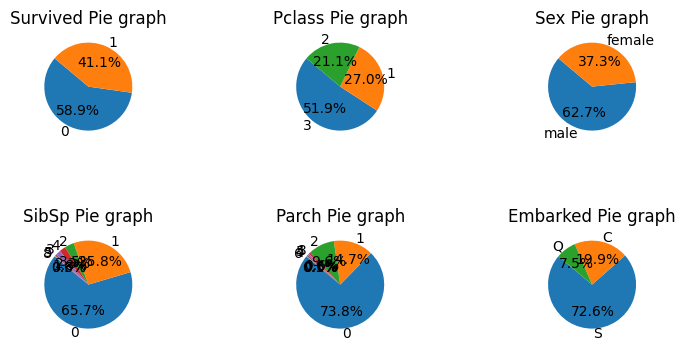

In [28]:
plt.figure(figsize=(9,4))
for i, col in enumerate(cat_cols) :
    plt.subplot(2 , 3 , i + 1)
    unique = df[col].value_counts()
    count = unique.values
    categories = unique.index
    plt.pie(count,labels= categories,startangle= 140 , autopct = "%1.1f%%")
    plt.title(f"{col} Pie graph")
plt.subplots_adjust(hspace=.8 , wspace=.3)
plt.show()    


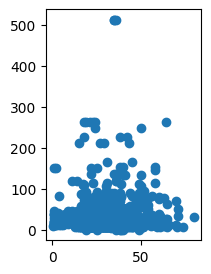

In [29]:
plt.figure(figsize=(2,3))
plt.scatter(df['Age'] , df['Fare'])

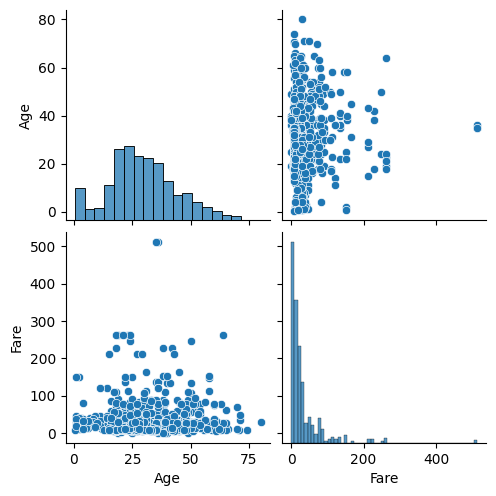

In [30]:
sns.pairplot(df)

In [31]:
corr = df[['Age' , 'Fare']].corr()
corr

,Age,Fare
Age,1.000000,0.090985
Fare,0.090985,1.000000


In [32]:
corr = df.select_dtypes(include="number").corr()
corr

,Age,Fare
Age,1.000000,0.090985
Fare,0.090985,1.000000


In [33]:
agg = df.pivot_table(index= 'Survived', columns='Sex', values='Age', aggfunc= len)
agg

Sex,female,male
Survived,,
0,76,382
1,214,106


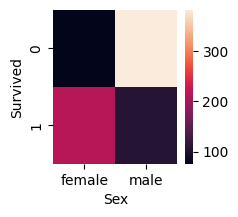

In [34]:
plt.figure(figsize=(2,2))
agg = df.pivot_table(index= 'Survived', columns='Sex', values='Age', aggfunc= len)
sns.heatmap(agg)
plt.show()

In [35]:
x = df.drop('Survived', axis=1)
y= df['Survived']

In [36]:
x

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,22.0,1,0,7.2500,S
1,1,female,38.0,1,0,71.2833,C
2,3,female,26.0,0,0,7.9250,S
3,1,female,35.0,1,0,53.1000,S
4,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...
885,3,female,39.0,0,5,29.1250,Q
887,1,female,19.0,0,0,30.0000,S
888,3,female,NaN,1,2,23.4500,S
889,1,male,26.0,0,0,30.0000,C


In [37]:
y

0      0
1      1
2      1
3      1
4      0
      ..
885    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 778, dtype: category
Categories (2, int64): [0, 1]

In [38]:
from sklearn.preprocessing import MinMaxScaler
num_cols = x.select_dtypes('number').columns
scaler = MinMaxScaler()
scaler.fit(x[num_cols])
x[num_cols] = scaler.transform(x[num_cols])

# Previewing x
x

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,0.271174,1,0,0.014151,S
1,1,female,0.472229,1,0,0.139136,C
2,3,female,0.321438,0,0,0.015469,S
3,1,female,0.434531,1,0,0.103644,S
4,3,male,0.434531,0,0,0.015713,S
...,...,...,...,...,...,...,...
885,3,female,0.484795,0,5,0.056848,Q
887,1,female,0.233476,0,0,0.058556,S
888,3,female,NaN,1,2,0.045771,S
889,1,male,0.321438,0,0,0.058556,C


In [39]:
str_cols = ['Sex', 'Embarked']

from category_encoders import OneHotEncoder

encoder = OneHotEncoder(cols=str_cols, drop_invariant=True)
x = encoder.fit_transform(x)

# Final preview of encoded dataframe
x

,Pclass,Sex_1,Sex_2,Age,SibSp,Parch,Fare,Embarked_1,Embarked_2,Embarked_3
0,3,1,0,0.271174,1,0,0.014151,1,0,0
1,1,0,1,0.472229,1,0,0.139136,0,1,0
2,3,0,1,0.321438,0,0,0.015469,1,0,0
3,1,0,1,0.434531,1,0,0.103644,1,0,0
4,3,1,0,0.434531,0,0,0.015713,1,0,0
...,...,...,...,...,...,...,...,...,...,...
885,3,0,1,0.484795,0,5,0.056848,0,0,1
887,1,0,1,0.233476,0,0,0.058556,1,0,0
888,3,0,1,NaN,1,2,0.045771,1,0,0
889,1,1,0,0.321438,0,0,0.058556,0,1,0


In [40]:
import plotly.express as px
import plotly.graph_objects as go

In [46]:
fig = px.pie(df , names='Survived' ,
       title = '<b>Survived distribution </b>' ,
       color_discrete_sequence= px.colors.qualitative.Pastel,
       hole = 0.4
       )
fig.show()

In [56]:
fig = px.pie(df , names='Survived' ,
       title = '<b>                          Survived distribution </b>' ,
       color_discrete_map = {0 : 'blue',
                             1 : 'red'},
       category_orders={'Survived ': ['1', '0']},                      
       hole = 0.7
       )
fig.show()

In [60]:
fig = px.pie(df , names='Survived' ,
       title = '<b>Survived distribution </b>' ,
       color_discrete_sequence= px.colors.qualitative.Pastel,
       hole = 0.4
       )
fig.update_layout(annotations = [dict(text = 'Survived ',font_size= 20 , x=0.5 ,y=0.5 , showarrow = False)])
fig.show()

In [69]:
px.histogram(df , x = 'Survived' , color = 'Sex' , title = '<b> Survived based on gender' , barmode = 'group')
#fig.update_layout(width = 500 , height = 400 , bargap = 0.4)

In [78]:
import plotly.subplots as sp
import plotly.graph_objects as go
fig = sp.make_subplots(rows = 1 , cols = len(num_cols) , subplot_titles= num_cols)
for i , col in enumerate(num_cols) :
    fig.add_trace(go.Histogram(x = df[col], name= col , marker= dict(line= dict(color= 'black', width= 1)))
                  , row = 1 , col = i + 1) 

fig.show()
    

In [79]:
%pip install dash

  Using cached requests-2.32.5-py3-none-any.whl.metadata (4.9 kB)
  Using cached jinja2-3.1.6-py3-none-any.whl.metadata (2.9 kB)
   ---------------------------------------- 0.0/7.2 MB ? eta -:--:--
   - -------------------------------------- 0.3/7.2 MB ? eta -:--:--
   -- ------------------------------------- 0.5/7.2 MB 1.1 MB/s eta 0:00:07
   ---- ----------------------------------- 0.8/7.2 MB 1.3 MB/s eta 0:00:05
   ----- ---------------------------------- 1.0/7.2 MB 1.5 MB/s eta 0:00:05
   -------- ------------------------------- 1.6/7.2 MB 1.6 MB/s eta 0:00:04
   ---------- ----------------------------- 1.8/7.2 MB 1.5 MB/s eta 0:00:04
   ----------- ---------------------------- 2.1/7.2 MB 1.6 MB/s eta 0:00:04
   ------------- -------------------------- 2.4/7.2 MB 1.4 MB/s eta 0:00:04
   -------------- ------------------------- 2.6/7.2 MB 1.5 MB/s eta 0:00:04
   --------------- ------------------------ 2.9/7.2 MB 1.5 MB/s eta 0:00:03
   ----------------- ---------------------- 3.1/7


[notice] A new release of pip is available: 25.3 -> 26.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [80]:
%pip install openpyxl


   ---------------------------------------- 0/2 [et-xmlfile]
   -------------------- ------------------- 1/2 [openpyxl]
   -------------------- ------------------- 1/2 [openpyxl]
   -------------------- ------------------- 1/2 [openpyxl]
   -------------------- ------------------- 1/2 [openpyxl]
   -------------------- ------------------- 1/2 [openpyxl]
   -------------------- ------------------- 1/2 [openpyxl]
   -------------------- ------------------- 1/2 [openpyxl]
   -------------------- ------------------- 1/2 [openpyxl]
   -------------------- ------------------- 1/2 [openpyxl]
   -------------------- ------------------- 1/2 [openpyxl]
   -------------------- ------------------- 1/2 [openpyxl]
   -------------------- ------------------- 1/2 [openpyxl]
   -------------------- ------------------- 1/2 [openpyxl]
   -------------------- ------------------- 1/2 [openpyxl]
   -------------------- ------------------- 1/2 [openpyxl]
   -------------------- ------------------- 1/2 [open


[notice] A new release of pip is available: 25.3 -> 26.0
[notice] To update, run: python.exe -m pip install --upgrade pip
